# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [3]:
%pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
sns.set(style="whitegrid")

In [6]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
21624,41,Self-emp-inc,125831,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1887,55,United-States,>50K
21319,29,Private,46987,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,55,United-States,<=50K
30288,40,Private,406811,HS-grad,9,Separated,Exec-managerial,Unmarried,White,Female,0,0,40,Canada,<=50K
14924,43,Federal-gov,19914,Some-college,10,Widowed,Exec-managerial,Unmarried,Amer-Indian-Eskimo,Female,0,0,15,United-States,<=50K
12149,22,Private,459463,12th,8,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,50,United-States,<=50K
17486,17,Private,158704,10th,6,Never-married,Sales,Own-child,White,Male,0,0,20,United-States,<=50K
10286,51,Federal-gov,73670,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,4386,0,52,United-States,>50K
29086,39,Private,290922,Masters,14,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,<=50K
7356,44,Local-gov,254134,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,Black,Male,0,0,40,United-States,<=50K
715,31,Private,295697,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K


In [7]:
data["hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

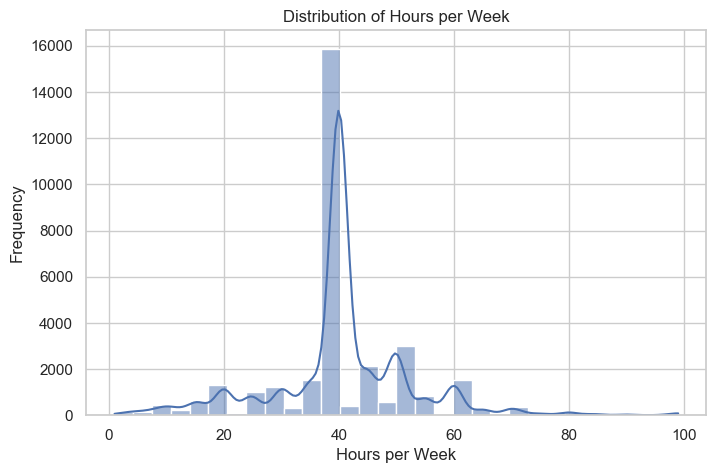

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data["hours-per-week"], bins=30, kde=True)
plt.title("Distribution of Hours per Week")
plt.xlabel("Hours per Week")
plt.ylabel("Frequency")
plt.show()

#### The distribution of `hours-per-week` is centered around 40 hours, with visible right skewness and several extreme values above 60 hours.This suggests the presence of outliers and non-normality.

In [9]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data["hours-per-week"].agg(["mean", "median", "std"])

mean      40.437456
median    40.000000
std       12.347429
Name: hours-per-week, dtype: float64

### Descriptive Statistics
#### The dataset contains a mix of demographic and economic variables. For `hours-per-week`, the mean and median are close to 40 hours indicating a typical full-time work schedule, with variability captured by the standard deviation.

In [11]:
missing_counts = data.isnull().sum()
missing_counts

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
missing_percent = (missing_counts / len(data)) * 100
 
missing_df = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage (%)": missing_percent
})
 
missing_df

,Missing Count,Missing Percentage (%)
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
education-num,0,0.0
marital-status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


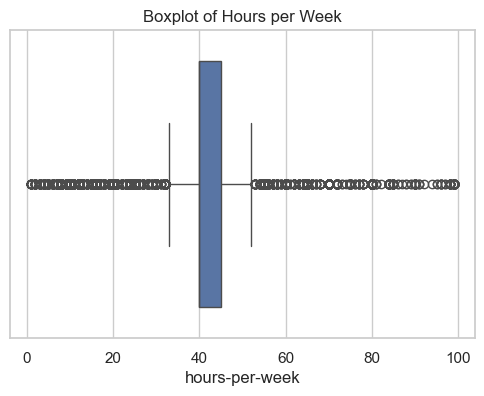

In [13]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data["hours-per-week"])
plt.title("Boxplot of Hours per Week")
plt.show()

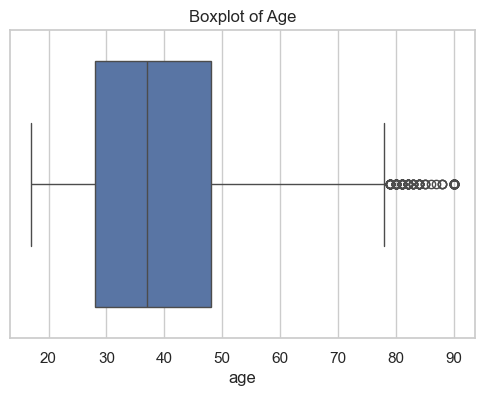

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data["age"])
plt.title("Boxplot of Age")
plt.show()

##### The boxplot reveals several outliers in `hours-per-week`, particularly for individuals reporting very high weekly working hours. These extreme values may influence model performance and require careful treatment during preprocessing.

### EDA Summary Report
 
#### The exploratory analysis shows that the target variable `hours-per-week` is heavily concentrated around the standard 40-hour work week, with right-skewed distribution and notable outliers at higher values. Several categorical variables contain missing values represented by placeholder symbols, indicating data quality issues that must be addressed during preprocessing. Outliers are present in numerical variables such as `hours-per-week` and `age`, which may affect regression models if left untreated.
#### Overall, the dataset is suitable for regression analysis but requires careful preprocessing, including missing value handling, encoding of categorical variables, and outlier treatment.